### Семинар 10. 
### Дисперсионный анализ.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import bartlett

*Задача 1:    
Есть ли различие между процентным содержанием изотопов плутония?    
Используйте функции в Python.
Провести предварительный разведочный анализ (проверку на нормальность и равенство
дисперсий*)*

In [27]:
pu_238 = np.array([0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
pu_239 = np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840, 62.455, 73.189, 75.968, 75.957, 72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 61.585, 61.332, 72.291, 73.451, 74.888, 60.507]) 
pu_240 = np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692, 25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285, 20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239, 21.761, 21.429, 20.939, 23.603])
pu_241 = np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512, 5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])

In [32]:
stats.shapiro(pu_240)

ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)

Условие нормальности не соблюдается

In [21]:
stats.bartlett(pu_238, pu_239, pu_240, pu_241)

BartlettResult(statistic=193.1803716617602, pvalue=1.2547805439253745e-41)

Используем непараметрические тесты

*Т.к. не соблюдаются условия применимости ANOVA, используем stats.kruskal(pu_238, pu_239, pu_240, pu_241)*

In [34]:
stats.kruskal(pu_238, pu_239, pu_240, pu_241)

KruskalResult(statistic=167.8178522154513, pvalue=3.76478949748032e-36)

Задача 2:     
Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг.   
Есть ли различия прибыли между 4-мя кварталами?   
Провести EDA (проверка на нормальность, проверка на однородность дисперсий с помощью Барлетт теста from scipy.stats import bartlett)   
Учитывайте при выборе теста тот факт, что при сбалансированных данных (выборки одинакового объема), неоднородность дисперсий слабо влияет на результат)

In [6]:
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ])
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ])
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ])

In [12]:
len(JJ_4)

21

In [38]:
stats.shapiro(JJ_4)

ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)

In [39]:
stats.bartlett(JJ_1, JJ_2, JJ_3, JJ_4)

BartlettResult(statistic=109.62893110687119, pvalue=1.3188378332498392e-23)

Вывод: Дисперсии неоднородны

In [41]:
stats.f_oneway(JJ_1, JJ_2, JJ_3, JJ_4)

F_onewayResult(statistic=162.03157448390618, pvalue=6.81307443530621e-34)

Вывод: Статичстически значимые различия есть

*Провести post hoc tests к задаче 2.   
Между какими группами не обнаружено статистически значимых различий?*

In [13]:
df=pd.DataFrame({"score":[0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 
                          1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16, 1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 
                          1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42, 
                          3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 
                          6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83, 6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 
                          9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61],
                 "group":np.repeat(["JJ_1","JJ_2","JJ_3","JJ_4"], repeats =21)})
tukey=pairwise_tukeyhsd(df["score"],
                        df["group"],
                        alpha =0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  JJ_1   JJ_2   1.1276 0.1282 -0.2087   2.464  False
  JJ_1   JJ_3     4.61    0.0  3.2737  5.9463   True
  JJ_1   JJ_4  10.1986    0.0  8.8622 11.5349   True
  JJ_2   JJ_3   3.4824    0.0   2.146  4.8187   True
  JJ_2   JJ_4    9.071    0.0  7.7346 10.4073   True
  JJ_3   JJ_4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


***Задачи на повторение***
*Задача 4:   
Даны веса пациентов до и после диеты. Веса распределены нормально   
До 92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9   
После 87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6   
Проверить гипотезу о, том что средний вес пациентов после диеты статистически меньше веса до диеты   
*1) Используйте alternative='greater‘   
*2) alternative=‘less‘   
*3) 'two-sided'   
Объясните полученные результаты p-value для каждого случая*

In [59]:
before = np.array([92.8 , 95.6, 92.1, 100.6, 96.2, 92.1, 96.7, 97.6, 97.0, 93.9])
after = np.array([87.1, 84.1, 81.3, 77.0, 86.0, 82.9, 83.0, 85.5, 85.2, 84.6])
n = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
stats.ttest_rel(before,after, alternative = "less")

Ttest_relResult(statistic=7.972831441034037, pvalue=0.9999886277862766)

In [47]:
stats.ttest_rel(before,after, alternative = "greater")

Ttest_relResult(statistic=7.972831441034037, pvalue=1.1372213723408018e-05)

In [48]:
stats.ttest_rel(before,after, alternative = "two-sided")

Ttest_relResult(statistic=7.972831441034037, pvalue=2.2744427446816035e-05)

In [50]:
stats.ttest_rel(before,after)

Ttest_relResult(statistic=7.972831441034037, pvalue=2.2744427446816035e-05)

In [52]:
0.9999886277862766 + 1.1372213723408018e-05 

1.0

In [54]:
np.mean(before)

95.46000000000001

In [56]:
np.mean(after)

83.67

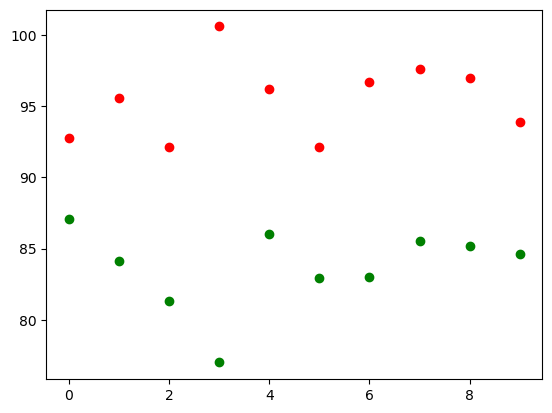

In [60]:
plt.scatter(n, before, color="red")
plt.scatter(n, after, color="green")
plt.show()

*Задача 6:    
В одной группе из 100 больных наблюдалось улучшение у 75, а в другой из 100 больных среди 69.    
Оценить с помощью доверительного интервала разность долей больных, у которых наблюдались улучшения.*

$Δ$ ± $\displaystyle Z_{α/2}$*$S_Δ$

In [62]:
delta = 0.75 - 0.69
delta

0.06000000000000005

In [64]:
stats.norm.ppf(0.975)

1.959963984540054

$S_Δ$ = $\displaystyle \sqrt {P_{общ}*(1 - P_{общ})*(\frac{1}{n_1}+\frac {1}{n_2})}$

$P_{общ} = \frac{m_1+m_2}{n_1+n_2}$    
где $m_1$ = 75, $m_2$ = 69, $n_1=n_2$ = 100

In [67]:
P = (75 + 69)/(100 + 100)
P
n=100

In [70]:
S = np.sqrt(P * (1 - P) * (1/n + 1/n))
S

0.06349803146555018

In [77]:
left = delta - stats.norm.ppf(0.975) * S
right = delta + stats.norm.ppf(0.975) * S
print(f'Доверительный интервал [{left}; {right}]')

Доверительный интервал [-0.0644538547616694; 0.1844538547616695]


*Задача 7   
Какова вероятность, что в наудачу выбранном двузначном числе цифры одинаковые?*

Благоприятные исходы - одинаковые цифры   
$C_9^1$    
Выбрать первую цифру $C_9^1$    
Выбрать вторую цифру $C_{10}^1$  
Общий исход  $C_9^1$ * $C_{10}^1$ 

$P = \frac {C_9^1}{C_9^1*C_{10}^1}$
